In [1]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#using pandas to read the database stored in the same folder
data=pd.read_csv("mnist_test.csv")

In [4]:
# viewing coloumn heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#extracting data from the dataset and viewing then up close
a=data.iloc[1,1:].values

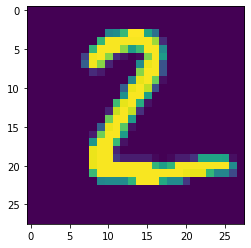

In [6]:
#reshping the extracted data into a resonable size
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [8]:
#preparing the data
#seperating labels and data values 
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [10]:
#creating test and train sizes/batches
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.4,random_state=5)

In [11]:
#checking data
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

9819    1
527     8
7969    1
7312    3
9942    3
Name: label, dtype: int64

In [14]:
# call rf classifier
rf=RandomForestClassifier(n_estimators=100)

In [15]:
# fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#prediction on test data
pred=rf.predict(x_test)

In [17]:
pred

array([2, 3, 9, ..., 3, 7, 1])

In [21]:
#check prediction accuracy
s=y_test.values
#calculate no. of correctly predicted values
count=0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1 

In [22]:
count

3805

In [23]:
#total values that to be prediction code was run on 
len(pred)

4000

In [24]:
#accuracy value
3805/4000

0.95125